In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)


In [2]:
import matplotlib.pyplot as plt

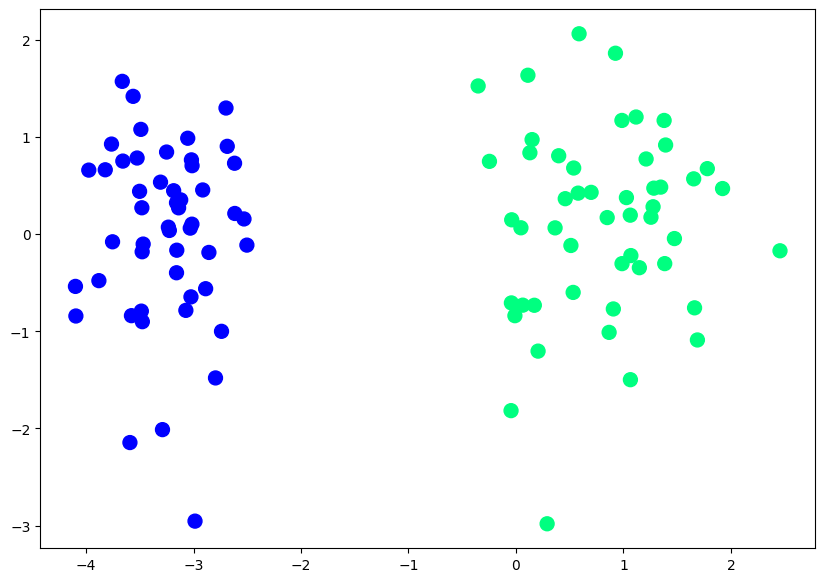

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)


In [9]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(penalty="none", solver="sag")
lor.fit(X, y)
print(lor.coef_)
print(lor.intercept_)

[[5.05726314 0.28311175]]
[4.99714321]


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [11]:
m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
b1 = -(lor.intercept_ / lor.coef_[0][1])
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def gd(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    epochs = 5000

    for i in range(epochs):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * (np.dot((y - y_hat), X) / X.shape[0])

    return weights[1:], weights[0]

In [17]:
coef_, intercept_ = gd(X, y)
print(coef_)
print(intercept_)

[4.83926872 0.21182255]
5.83338864905325


In [19]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

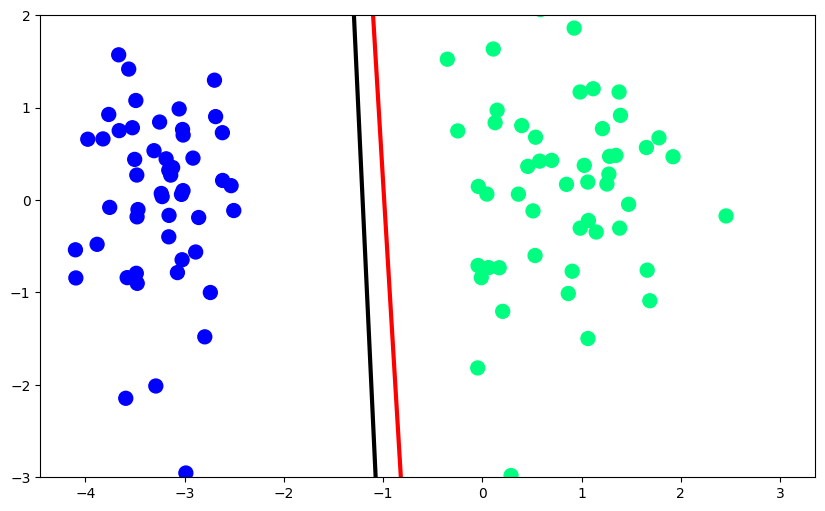

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.plot(x_input1, y_input1, color="black", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)